# DDFH-G DATASET

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [29]:
df = pd.read_csv("DDFH-G.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=0)

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

# Base Model

SVM Test Set Metrics:
Test Accuracy: 0.9704545454545455
Test Precision: 1.0
Test Sensitivity (Recall): 0.9103448275862069
Test Specificity: 1.0
Test F1 Score: 0.9530685920577617
Test Matthews Correlation Coefficient: 0.933767199180829
Test Confusion Matrix:
 [[295   0]
 [ 13 132]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       295
           1       1.00      0.91      0.95       145

    accuracy                           0.97       440
   macro avg       0.98      0.96      0.97       440
weighted avg       0.97      0.97      0.97       440


Random Forest Test Set Metrics:
Test Accuracy: 0.990909090909091
Test Precision: 0.9862068965517241
Test Sensitivity (Recall): 0.9862068965517241
Test Specificity: 0.9932203389830508
Test F1 Score: 0.9862068965517241
Test Matthews Correlation Coefficient: 0.979427235534775
Test Confusion Matrix:
 [[293   2]
 [  2 143]]
Test Classification Report:
            

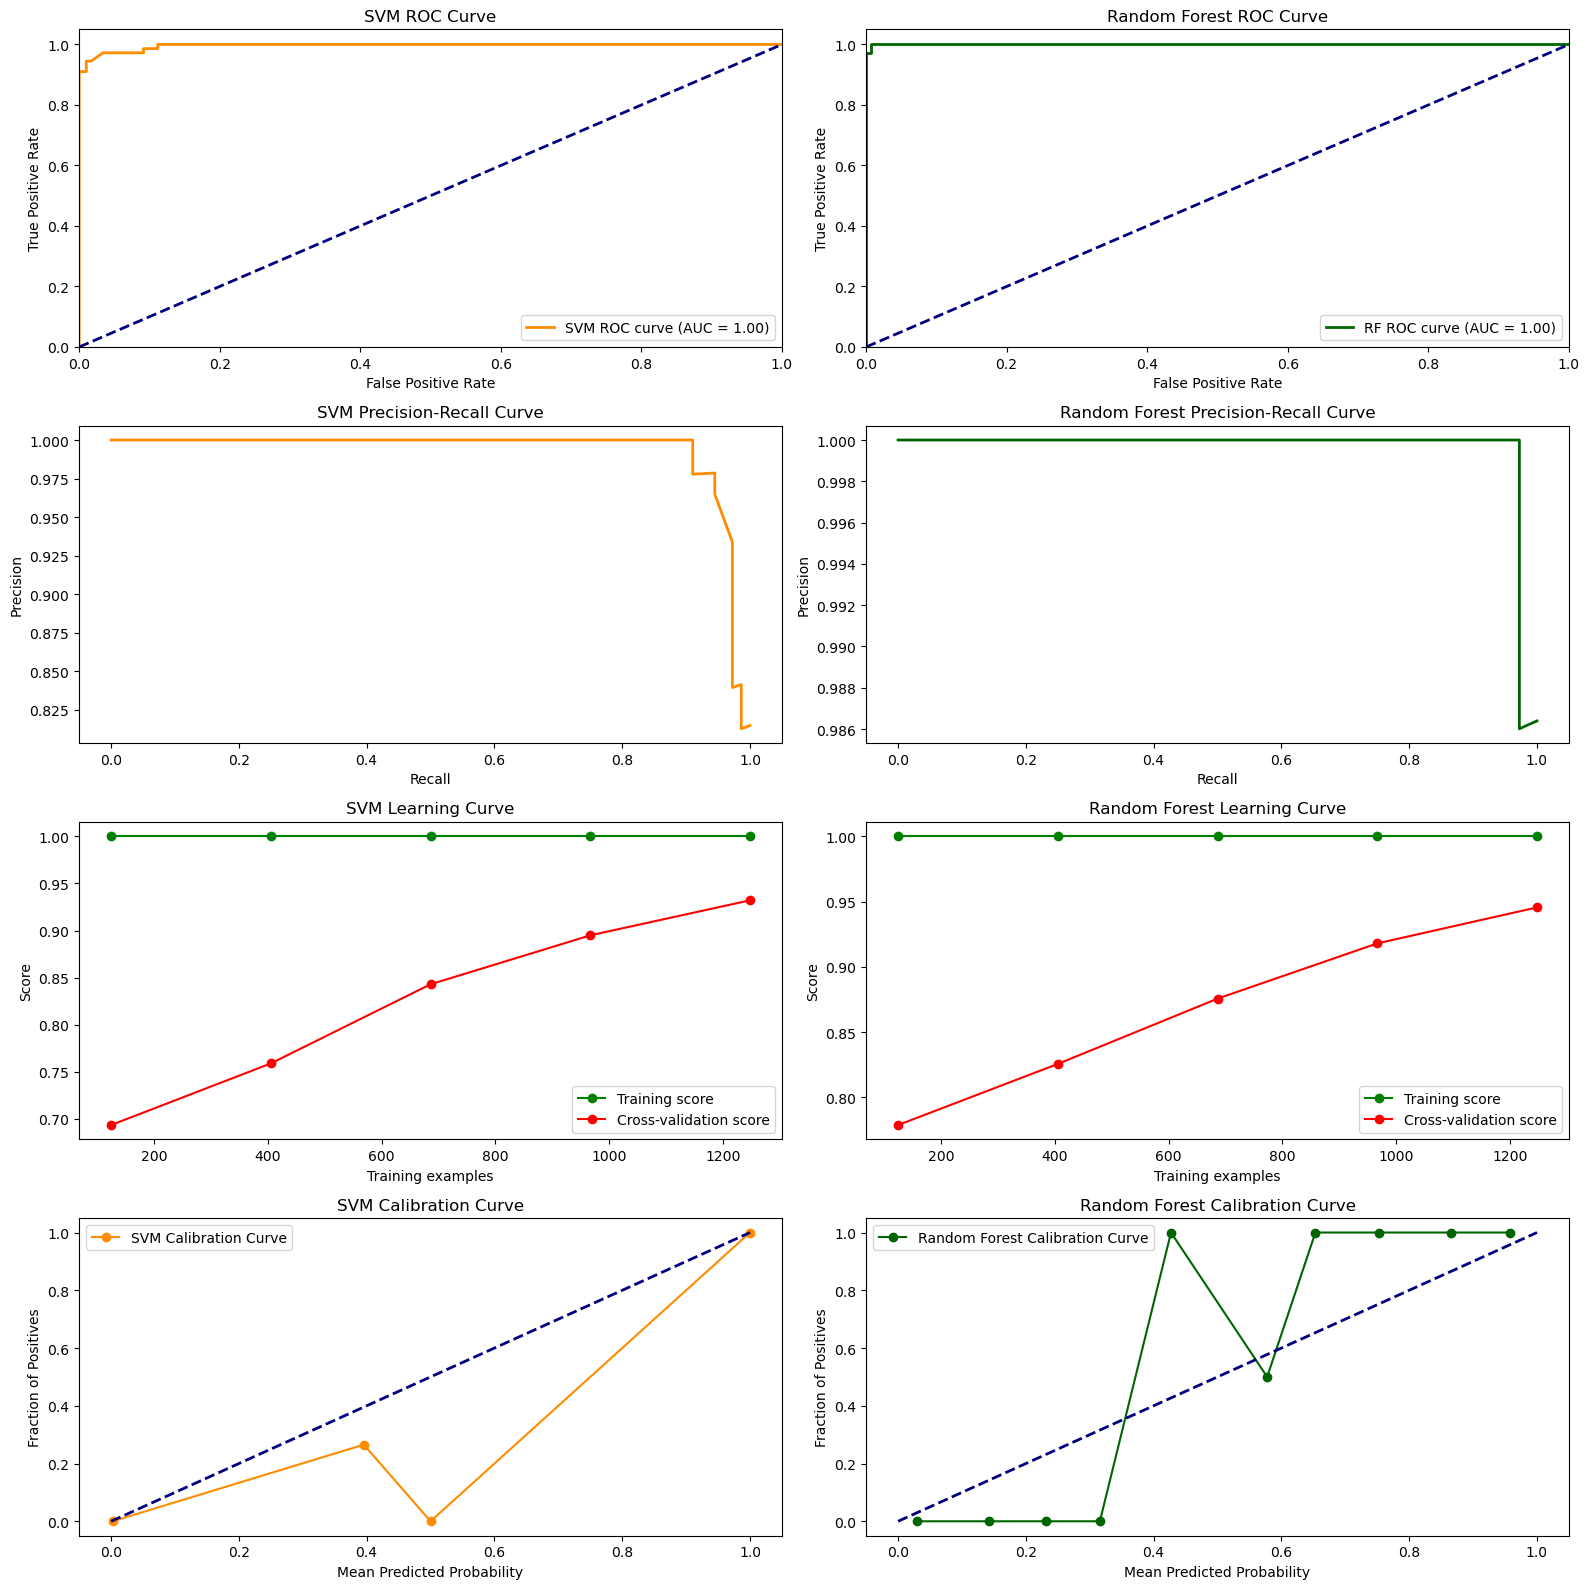

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define and fit models
svm = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

# Predict probabilities for SVM and Random Forest
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ---- Metrics for SVM ----
pre_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, pre_test_svm)
conf_matrix_test_svm = confusion_matrix(y_test, pre_test_svm)
precision_test_svm = precision_score(y_test, pre_test_svm, average='binary')
sensitivity_test_svm = recall_score(y_test, pre_test_svm, average='binary')
specificity_test_svm = conf_matrix_test_svm[0, 0] / (conf_matrix_test_svm[0, 0] + conf_matrix_test_svm[0, 1])
f1_test_svm = f1_score(y_test, pre_test_svm, average='binary')
mcc_test_svm = matthews_corrcoef(y_test, pre_test_svm)

print("SVM Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_svm}")
print(f"Test Precision: {precision_test_svm}")
print(f"Test Sensitivity (Recall): {sensitivity_test_svm}")
print(f"Test Specificity: {specificity_test_svm}")
print(f"Test F1 Score: {f1_test_svm}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_svm}")
print("Test Confusion Matrix:\n", conf_matrix_test_svm)
print("Test Classification Report:\n", classification_report(y_test, pre_test_svm))

# ---- Metrics for Random Forest ----
pre_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, pre_test_rf)
conf_matrix_test_rf = confusion_matrix(y_test, pre_test_rf)
precision_test_rf = precision_score(y_test, pre_test_rf, average='binary')
sensitivity_test_rf = recall_score(y_test, pre_test_rf, average='binary')
specificity_test_rf = conf_matrix_test_rf[0, 0] / (conf_matrix_test_rf[0, 0] + conf_matrix_test_rf[0, 1])
f1_test_rf = f1_score(y_test, pre_test_rf, average='binary')
mcc_test_rf = matthews_corrcoef(y_test, pre_test_rf)

print("\nRandom Forest Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_rf}")
print(f"Test Precision: {precision_test_rf}")
print(f"Test Sensitivity (Recall): {sensitivity_test_rf}")
print(f"Test Specificity: {specificity_test_rf}")
print(f"Test F1 Score: {f1_test_rf}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_rf}")
print("Test Confusion Matrix:\n", conf_matrix_test_rf)
print("Test Classification Report:\n", classification_report(y_test, pre_test_rf))

# ---- ROC Curve with AUC for SVM and Random Forest ----
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ---- Precision-Recall Curve for SVM and Random Forest ----
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# ---- Learning Curve for SVM and Random Forest ----
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(svm, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

# ---- Calibration Curve for SVM and Random Forest ----
fraction_of_positives_svm, mean_predicted_value_svm = calibration_curve(y_test, y_prob_svm, n_bins=10)
fraction_of_positives_rf, mean_predicted_value_rf = calibration_curve(y_test, y_prob_rf, n_bins=10)

# ---- Plotting All Curves ----
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# 1. ROC Curve for SVM
axs[0, 0].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('SVM ROC Curve')
axs[0, 0].legend(loc="lower right")

# 2. ROC Curve for Random Forest
axs[0, 1].plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Random Forest ROC Curve')
axs[0, 1].legend(loc="lower right")

# 3. Precision-Recall Curve for SVM
axs[1, 0].plot(recall_svm, precision_svm, lw=2, color='darkorange')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('SVM Precision-Recall Curve')

# 4. Precision-Recall Curve for Random Forest
axs[1, 1].plot(recall_rf, precision_rf, lw=2, color='darkgreen')
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Random Forest Precision-Recall Curve')

# 5. Learning Curve for SVM
axs[2, 0].plot(train_sizes_svm, train_scores_mean_svm, 'o-', color='green', label='Training score')
axs[2, 0].plot(train_sizes_svm, test_scores_mean_svm, 'o-', color='red', label='Cross-validation score')
axs[2, 0].set_xlabel('Training examples')
axs[2, 0].set_ylabel('Score')
axs[2, 0].set_title('SVM Learning Curve')
axs[2, 0].legend(loc="best")

# 6. Learning Curve for Random Forest
axs[2, 1].plot(train_sizes_rf, train_scores_mean_rf, 'o-', color='green', label='Training score')
axs[2, 1].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color='red', label='Cross-validation score')
axs[2, 1].set_xlabel('Training examples')
axs[2, 1].set_ylabel('Score')
axs[2, 1].set_title('Random Forest Learning Curve')
axs[2, 1].legend(loc="best")


# 7. Calibration Curve for SVM
axs[3, 0].plot(mean_predicted_value_svm, fraction_of_positives_svm, marker='o', color='darkorange', label='SVM Calibration Curve')
axs[3, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 0].set_xlabel('Mean Predicted Probability')
axs[3, 0].set_ylabel('Fraction of Positives')
axs[3, 0].set_title('SVM Calibration Curve')
axs[3, 0].legend(loc="best")

# 8. Calibration Curve for Random Forest
axs[3, 1].plot(mean_predicted_value_rf, fraction_of_positives_rf, marker='o', color='darkgreen', label='Random Forest Calibration Curve')
axs[3, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 1].set_xlabel('Mean Predicted Probability')
axs[3, 1].set_ylabel('Fraction of Positives')
axs[3, 1].set_title('Random Forest Calibration Curve')
axs[3, 1].legend(loc="best")


plt.tight_layout()
plt.show()


# Voting Classifier

Voting Classifier Test Metrics:
Accuracy: 0.9863636363636363
Precision: 1.0
Sensitivity (Recall): 0.9586206896551724
Specificity: 1.0
F1 Score: 0.9788732394366197
Matthews Correlation Coefficient: 0.9692842573718797
Confusion Matrix:
 [[295   0]
 [  6 139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       295
           1       1.00      0.96      0.98       145

    accuracy                           0.99       440
   macro avg       0.99      0.98      0.98       440
weighted avg       0.99      0.99      0.99       440



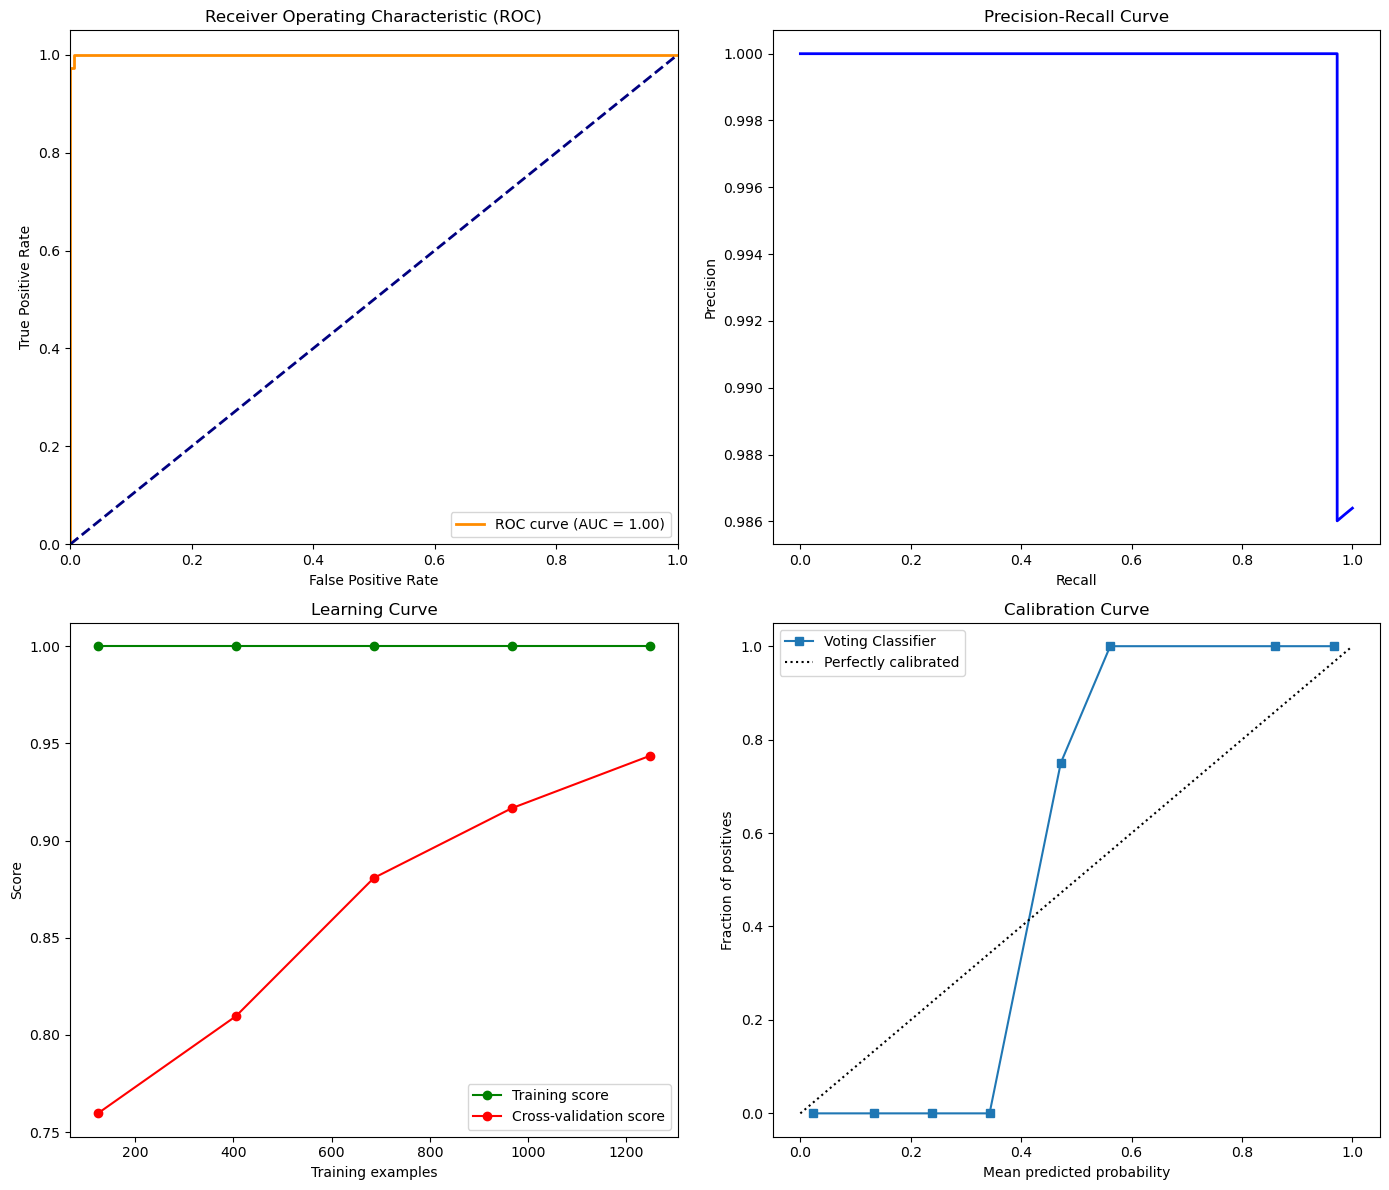

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')  # Use soft voting to get probabilities

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = voting_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Voting Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Voting Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Stacking Classifier

Stacking Classifier Test Metrics:
Accuracy: 0.990909090909091
Precision: 0.9862068965517241
Sensitivity (Recall): 0.9862068965517241
Specificity: 0.9932203389830508
F1 Score: 0.9862068965517241
Matthews Correlation Coefficient: 0.979427235534775
Confusion Matrix:
 [[293   2]
 [  2 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       295
           1       0.99      0.99      0.99       145

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



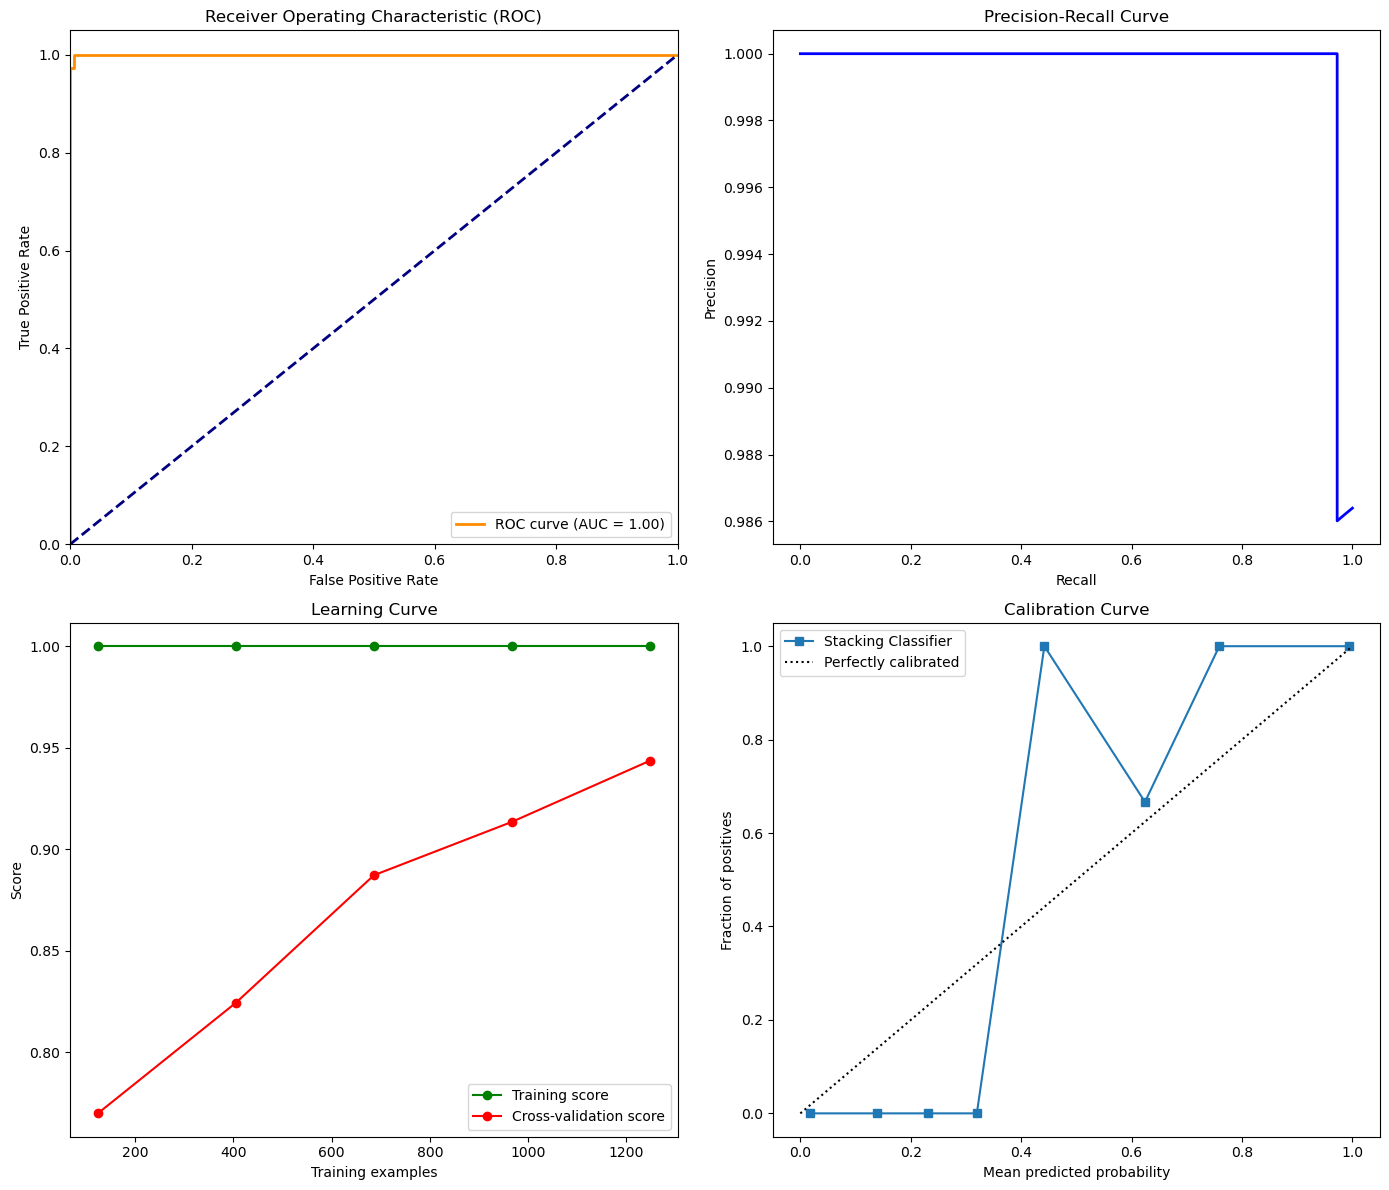

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the final estimator
final_estimator = LogisticRegression(random_state=0)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, passthrough=False)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = stacking_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = stacking_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Stacking Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Stacking Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Meta Model

Final Meta-Model Test accuracy: 0.990909090909091
Precision: 0.9862068965517241
Sensitivity (Recall): 0.9862068965517241
Specificity: 0.9932203389830508
F1 Score: 0.9862068965517241
Matthews Correlation Coefficient: 0.979427235534775
Confusion Matrix:
[[293   2]
 [  2 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       295
           1       0.99      0.99      0.99       145

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



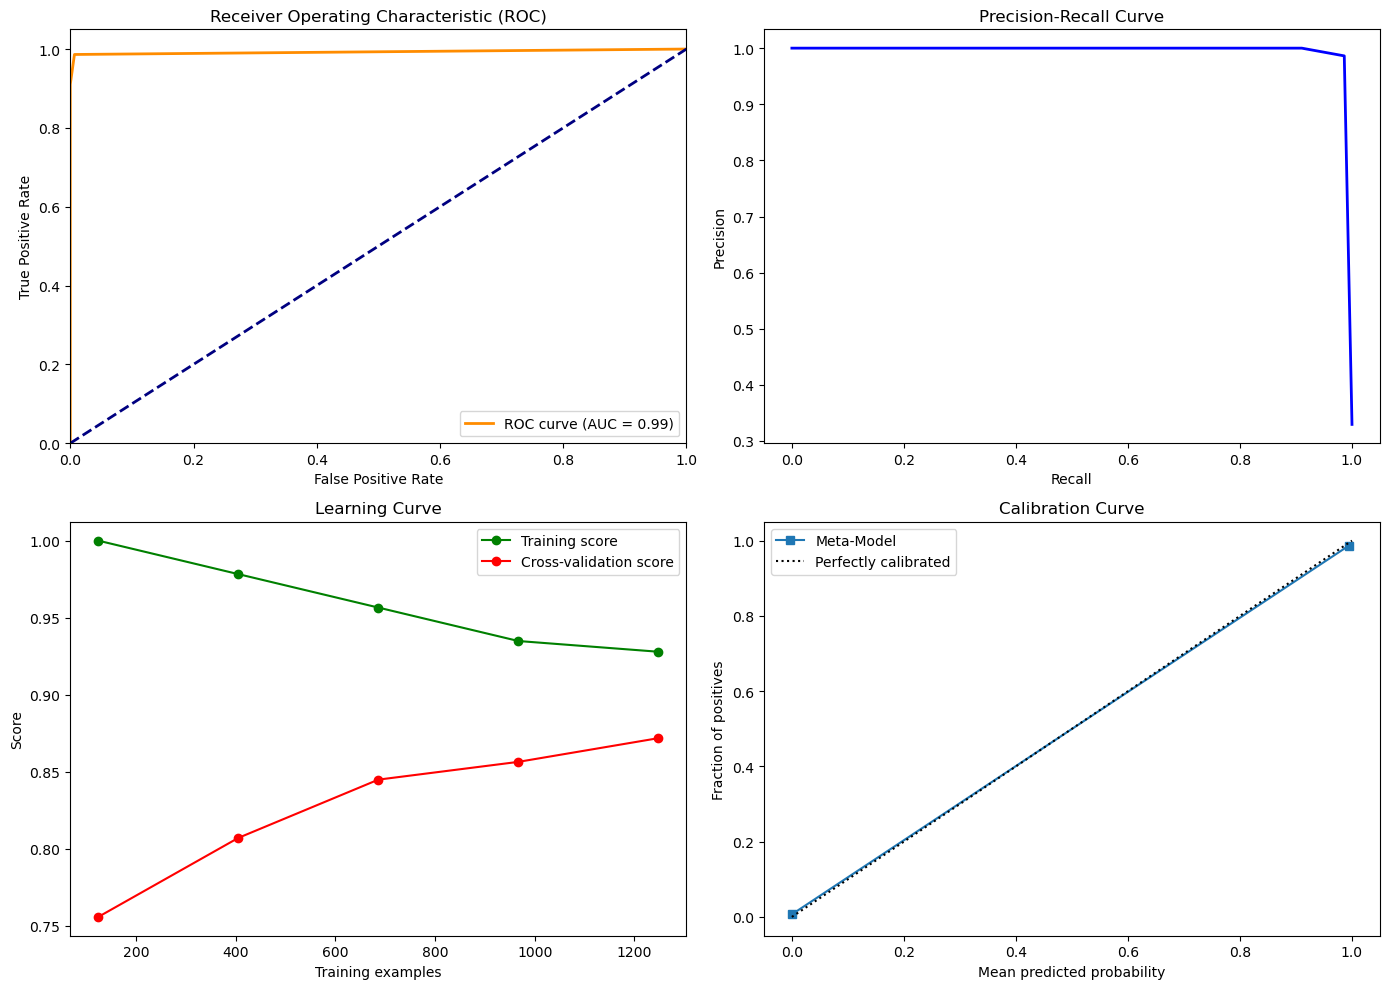

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # LogisticRegression(), MLPClassifier() can also be used

# Split data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Compute various metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)  # Sensitivity
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Display the metrics
print(f'Final Meta-Model Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report(y_test, final_predictions))

# ---- Visualization Section ----

# Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(meta_model1, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.subplot(2, 2, 3)
plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")

# Plot Calibration Curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

plt.subplot(2, 2, 4)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Meta-Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="best")

plt.tight_layout()
plt.show()






In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22,random_state=0)

In [76]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

# Meta Model

Final Meta-Model Test accuracy: 0.9704545454545455
Precision: 1.0
Sensitivity (Recall): 0.9103448275862069
Specificity: 1.0
F1 Score: 0.9530685920577617
Matthews Correlation Coefficient: 0.933767199180829
Confusion Matrix:
[[295   0]
 [ 13 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       295
           1       1.00      0.91      0.95       145

    accuracy                           0.97       440
   macro avg       0.98      0.96      0.97       440
weighted avg       0.97      0.97      0.97       440



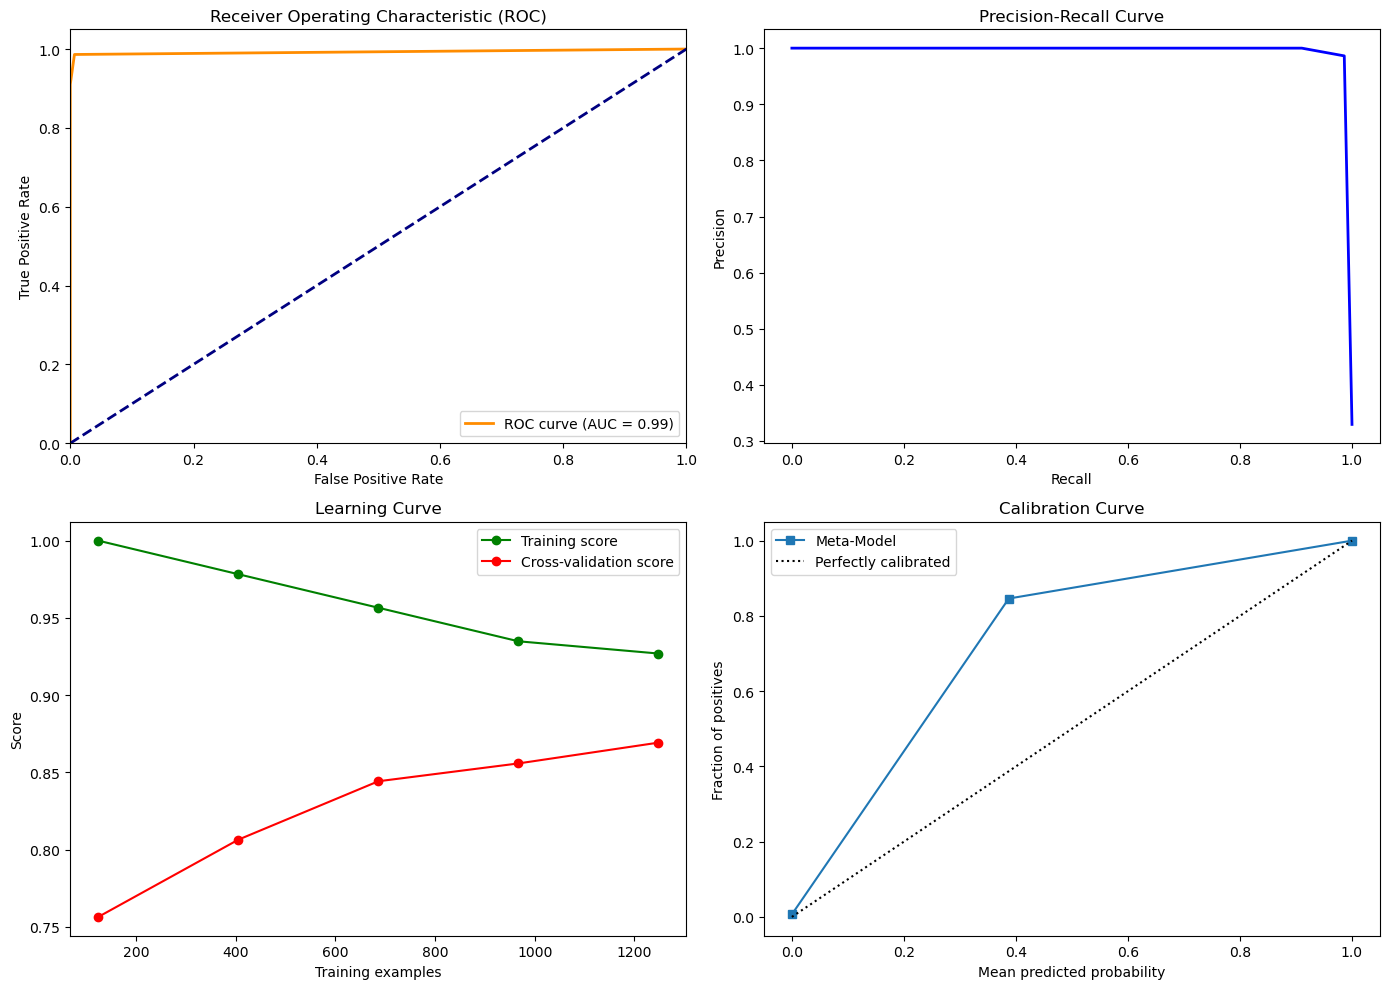

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # LogisticRegression(), MLPClassifier() can also be used

# Split data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Compute various metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)  # Sensitivity
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Display the metrics
print(f'Final Meta-Model Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report(y_test, final_predictions))

# ---- Visualization Section ----

# Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(meta_model1, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.subplot(2, 2, 3)
plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")

# Plot Calibration Curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

plt.subplot(2, 2, 4)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Meta-Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="best")

plt.tight_layout()
plt.show()






# PIMA-INDIAN DATASET

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [23]:
df = pd.read_csv("pima-i.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=0)

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)


SVC(random_state=0)

# Base Model

SVM Test Set Metrics:
Test Accuracy: 0.9725
Test Precision: 1.0
Test Sensitivity (Recall): 0.9140625
Test Specificity: 1.0
Test F1 Score: 0.9551020408163265
Test Matthews Correlation Coefficient: 0.9373012156743389
Test Confusion Matrix:
 [[272   0]
 [ 11 117]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       272
           1       1.00      0.91      0.96       128

    accuracy                           0.97       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400


Random Forest Test Set Metrics:
Test Accuracy: 0.99
Test Precision: 1.0
Test Sensitivity (Recall): 0.96875
Test Specificity: 1.0
Test F1 Score: 0.9841269841269841
Test Matthews Correlation Coefficient: 0.9770927002733857
Test Confusion Matrix:
 [[272   0]
 [  4 124]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      

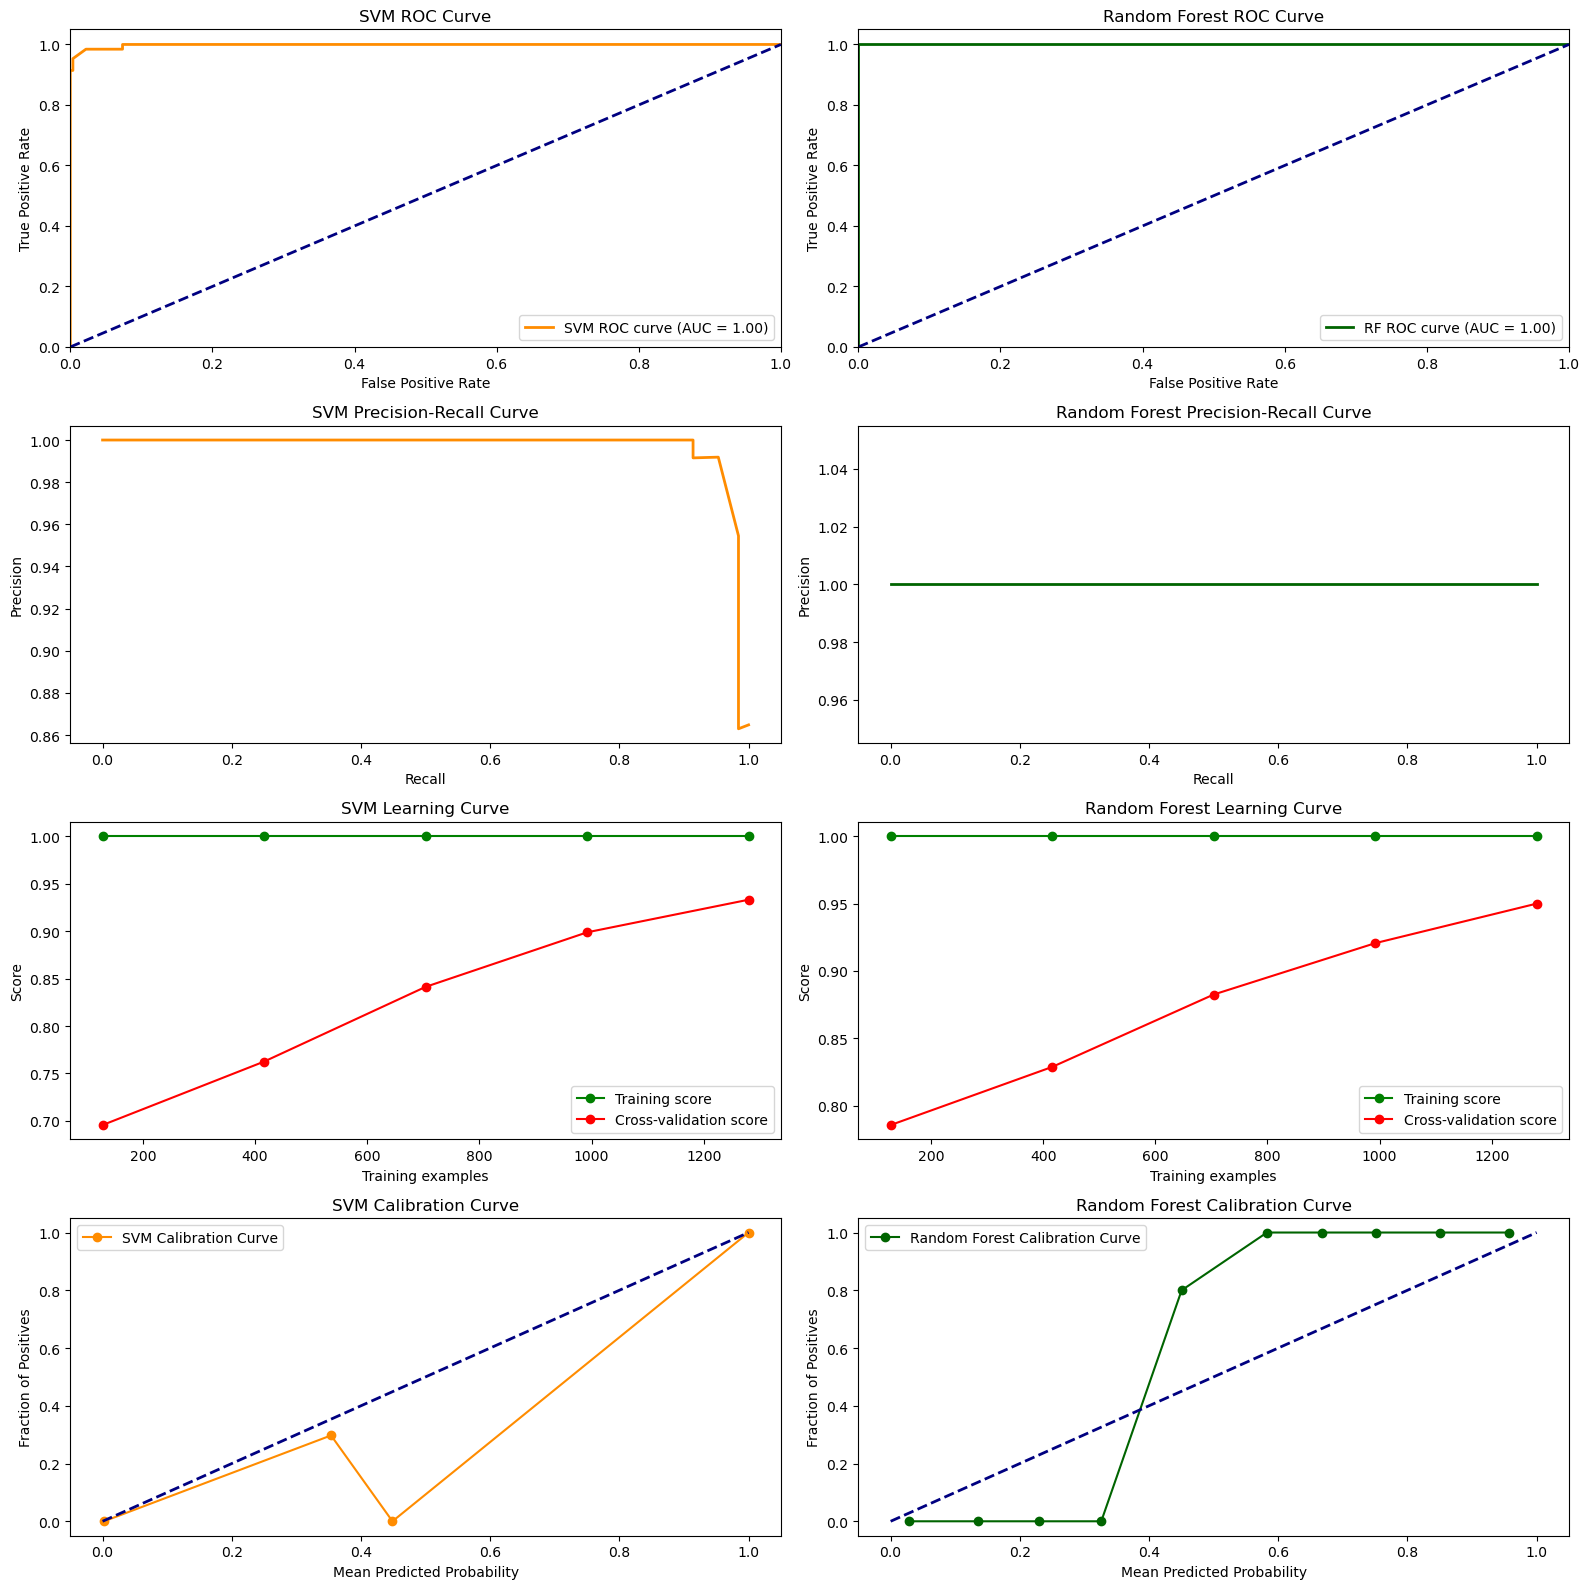

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef, classification_report

# Define and fit models
svm = SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)
svm.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                            min_samples_leaf=1, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

# Predict probabilities for SVM and Random Forest
y_prob_svm = svm.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# ---- Metrics for SVM ----
pre_test_svm = svm.predict(X_test)
accuracy_test_svm = accuracy_score(y_test, pre_test_svm)
conf_matrix_test_svm = confusion_matrix(y_test, pre_test_svm)
precision_test_svm = precision_score(y_test, pre_test_svm, average='binary')
sensitivity_test_svm = recall_score(y_test, pre_test_svm, average='binary')
specificity_test_svm = conf_matrix_test_svm[0, 0] / (conf_matrix_test_svm[0, 0] + conf_matrix_test_svm[0, 1])
f1_test_svm = f1_score(y_test, pre_test_svm, average='binary')
mcc_test_svm = matthews_corrcoef(y_test, pre_test_svm)

print("SVM Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_svm}")
print(f"Test Precision: {precision_test_svm}")
print(f"Test Sensitivity (Recall): {sensitivity_test_svm}")
print(f"Test Specificity: {specificity_test_svm}")
print(f"Test F1 Score: {f1_test_svm}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_svm}")
print("Test Confusion Matrix:\n", conf_matrix_test_svm)
print("Test Classification Report:\n", classification_report(y_test, pre_test_svm))

# ---- Metrics for Random Forest ----
pre_test_rf = rf.predict(X_test)
accuracy_test_rf = accuracy_score(y_test, pre_test_rf)
conf_matrix_test_rf = confusion_matrix(y_test, pre_test_rf)
precision_test_rf = precision_score(y_test, pre_test_rf, average='binary')
sensitivity_test_rf = recall_score(y_test, pre_test_rf, average='binary')
specificity_test_rf = conf_matrix_test_rf[0, 0] / (conf_matrix_test_rf[0, 0] + conf_matrix_test_rf[0, 1])
f1_test_rf = f1_score(y_test, pre_test_rf, average='binary')
mcc_test_rf = matthews_corrcoef(y_test, pre_test_rf)

print("\nRandom Forest Test Set Metrics:")
print(f"Test Accuracy: {accuracy_test_rf}")
print(f"Test Precision: {precision_test_rf}")
print(f"Test Sensitivity (Recall): {sensitivity_test_rf}")
print(f"Test Specificity: {specificity_test_rf}")
print(f"Test F1 Score: {f1_test_rf}")
print(f"Test Matthews Correlation Coefficient: {mcc_test_rf}")
print("Test Confusion Matrix:\n", conf_matrix_test_rf)
print("Test Classification Report:\n", classification_report(y_test, pre_test_rf))

# ---- ROC Curve with AUC for SVM and Random Forest ----
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# ---- Precision-Recall Curve for SVM and Random Forest ----
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# ---- Learning Curve for SVM and Random Forest ----
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(svm, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_svm = np.mean(train_scores_svm, axis=1)
test_scores_mean_svm = np.mean(test_scores_svm, axis=1)

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)

# ---- Calibration Curve for SVM and Random Forest ----
fraction_of_positives_svm, mean_predicted_value_svm = calibration_curve(y_test, y_prob_svm, n_bins=10)
fraction_of_positives_rf, mean_predicted_value_rf = calibration_curve(y_test, y_prob_rf, n_bins=10)

# ---- Plotting All Curves ----
fig, axs = plt.subplots(4, 2, figsize=(16, 16))

# 1. ROC Curve for SVM
axs[0, 0].plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc_svm:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('SVM ROC Curve')
axs[0, 0].legend(loc="lower right")

# 2. ROC Curve for Random Forest
axs[0, 1].plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('Random Forest ROC Curve')
axs[0, 1].legend(loc="lower right")

# 3. Precision-Recall Curve for SVM
axs[1, 0].plot(recall_svm, precision_svm, lw=2, color='darkorange')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('SVM Precision-Recall Curve')

# 4. Precision-Recall Curve for Random Forest
axs[1, 1].plot(recall_rf, precision_rf, lw=2, color='darkgreen')
axs[1, 1].set_xlabel('Recall')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_title('Random Forest Precision-Recall Curve')

# 5. Learning Curve for SVM
axs[2, 0].plot(train_sizes_svm, train_scores_mean_svm, 'o-', color='green', label='Training score')
axs[2, 0].plot(train_sizes_svm, test_scores_mean_svm, 'o-', color='red', label='Cross-validation score')
axs[2, 0].set_xlabel('Training examples')
axs[2, 0].set_ylabel('Score')
axs[2, 0].set_title('SVM Learning Curve')
axs[2, 0].legend(loc="best")

# 6. Learning Curve for Random Forest
axs[2, 1].plot(train_sizes_rf, train_scores_mean_rf, 'o-', color='green', label='Training score')
axs[2, 1].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color='red', label='Cross-validation score')
axs[2, 1].set_xlabel('Training examples')
axs[2, 1].set_ylabel('Score')
axs[2, 1].set_title('Random Forest Learning Curve')
axs[2, 1].legend(loc="best")


# 7. Calibration Curve for SVM
axs[3, 0].plot(mean_predicted_value_svm, fraction_of_positives_svm, marker='o', color='darkorange', label='SVM Calibration Curve')
axs[3, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 0].set_xlabel('Mean Predicted Probability')
axs[3, 0].set_ylabel('Fraction of Positives')
axs[3, 0].set_title('SVM Calibration Curve')
axs[3, 0].legend(loc="best")

# 8. Calibration Curve for Random Forest
axs[3, 1].plot(mean_predicted_value_rf, fraction_of_positives_rf, marker='o', color='darkgreen', label='Random Forest Calibration Curve')
axs[3, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3, 1].set_xlabel('Mean Predicted Probability')
axs[3, 1].set_ylabel('Fraction of Positives')
axs[3, 1].set_title('Random Forest Calibration Curve')
axs[3, 1].legend(loc="best")


plt.tight_layout()
plt.show()


# Voting Classifier

Voting Classifier Test Metrics:
Accuracy: 0.9775
Precision: 1.0
Sensitivity (Recall): 0.9296875
Specificity: 1.0
F1 Score: 0.9635627530364372
Matthews Correlation Coefficient: 0.9486364066535028
Confusion Matrix:
 [[272   0]
 [  9 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       272
           1       1.00      0.93      0.96       128

    accuracy                           0.98       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.98      0.98      0.98       400



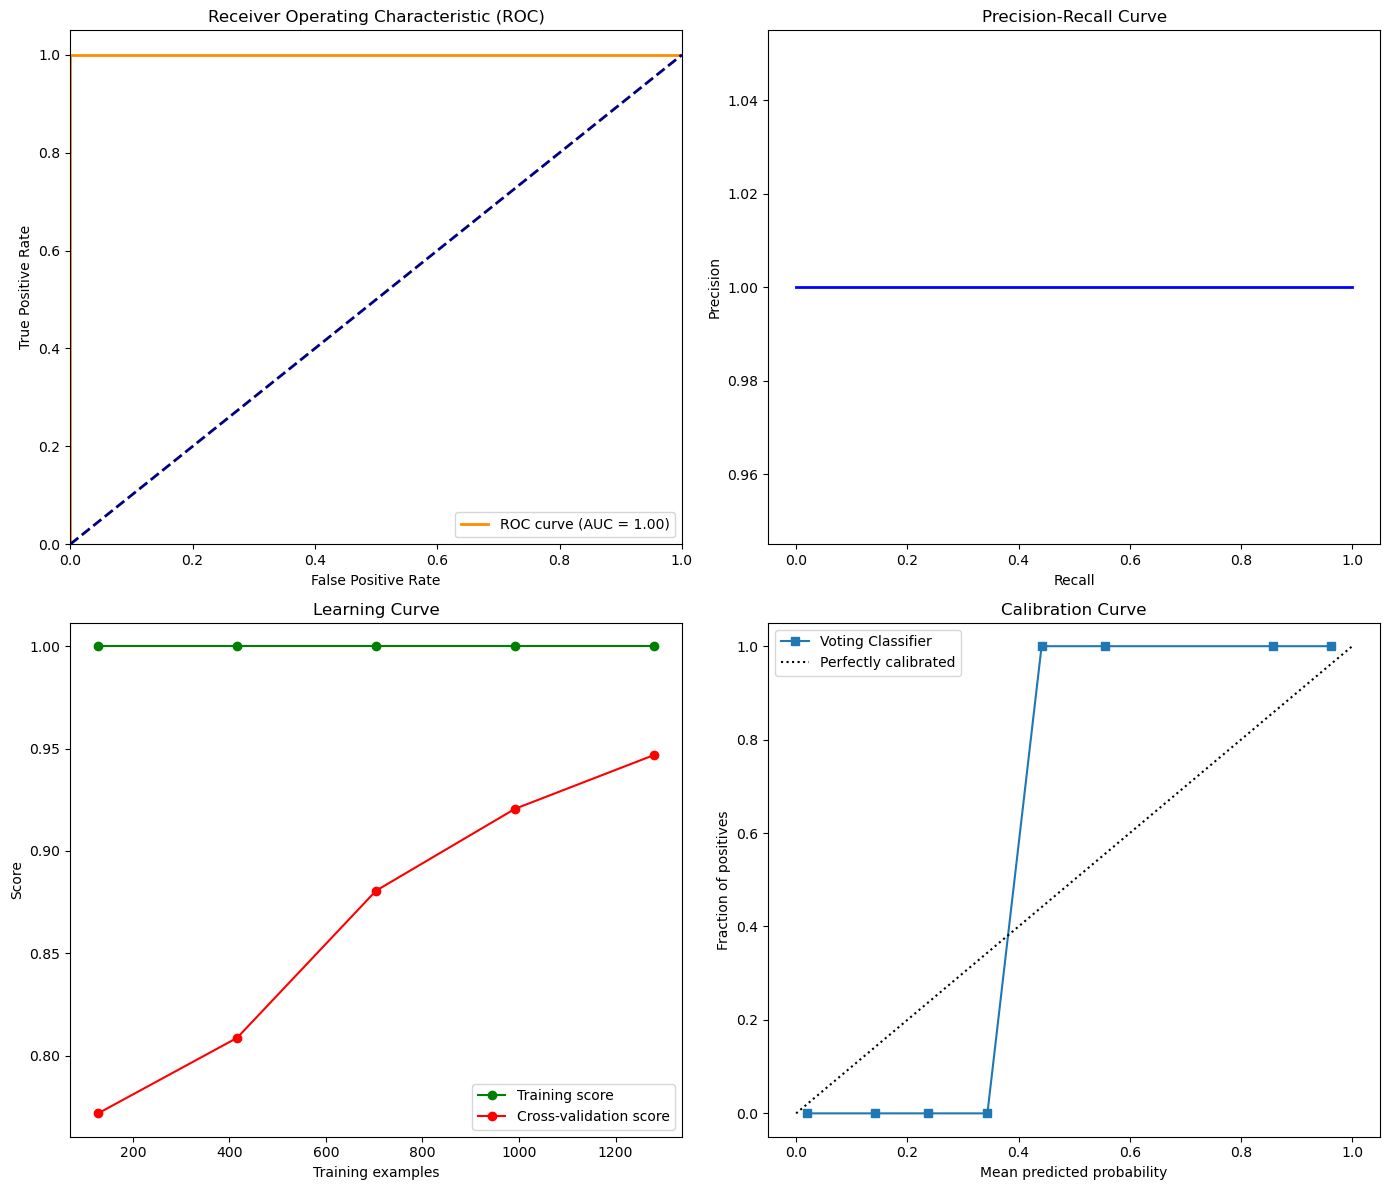

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the voting classifier
voting_clf = VotingClassifier(estimators=base_models, voting='soft')  # Use soft voting to get probabilities

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = voting_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = voting_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Voting Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Voting Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Stacking Classifier

Stacking Classifier Test Metrics:
Accuracy: 0.990909090909091
Precision: 0.9862068965517241
Sensitivity (Recall): 0.9862068965517241
Specificity: 0.9932203389830508
F1 Score: 0.9862068965517241
Matthews Correlation Coefficient: 0.979427235534775
Confusion Matrix:
 [[293   2]
 [  2 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       295
           1       0.99      0.99      0.99       145

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



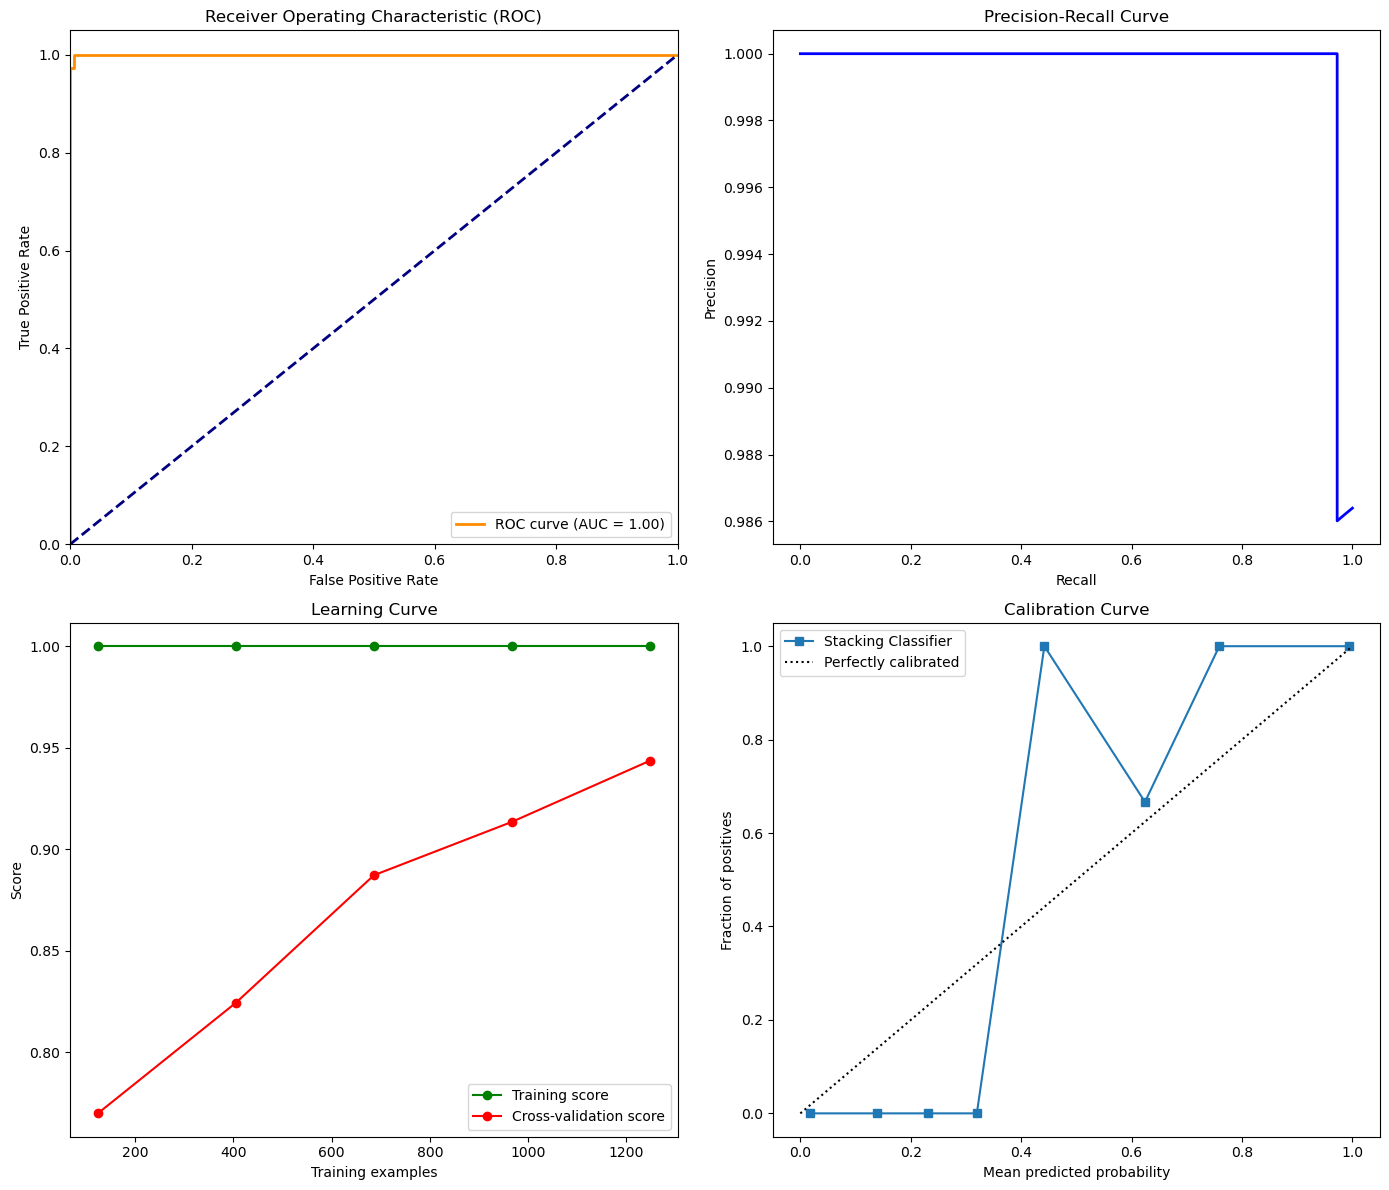

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Define the final estimator
final_estimator = LogisticRegression(random_state=0)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, passthrough=False)

# Fit the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict probabilities for ROC, Precision-Recall, and Calibration curve
y_prob = stacking_clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = stacking_clf.predict(X_test)

# ---- Metrics Calculation ----
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity is the same as recall
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Print metrics
print("Stacking Classifier Test Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"Matthews Correlation Coefficient: {mcc}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- ROC Curve with AUC ----
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# ---- Precision-Recall Curve ----
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# ---- Learning Curve ----
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# ---- Calibration Curve ----
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

# ---- Plotting All Curves Together ----
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic (ROC)')
axs[0, 0].legend(loc="lower right")

# 2. Precision-Recall Curve
axs[0, 1].plot(recall, precision, lw=2, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# 3. Learning Curve
axs[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
axs[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
axs[1, 0].set_xlabel('Training examples')
axs[1, 0].set_ylabel('Score')
axs[1, 0].set_title('Learning Curve')
axs[1, 0].legend(loc="best")

# 4. Calibration Curve
axs[1, 1].plot(mean_predicted_value, fraction_of_positives, "s-", label="Stacking Classifier")
axs[1, 1].plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
axs[1, 1].set_xlabel('Mean predicted probability')
axs[1, 1].set_ylabel('Fraction of positives')
axs[1, 1].set_title('Calibration Curve')
axs[1, 1].legend(loc="best")

plt.tight_layout()
plt.show()


# Meta Model

Final Meta-Model Test accuracy: 0.990909090909091
Precision: 0.9862068965517241
Sensitivity (Recall): 0.9862068965517241
Specificity: 0.9932203389830508
F1 Score: 0.9862068965517241
Matthews Correlation Coefficient: 0.979427235534775
Confusion Matrix:
[[293   2]
 [  2 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       295
           1       0.99      0.99      0.99       145

    accuracy                           0.99       440
   macro avg       0.99      0.99      0.99       440
weighted avg       0.99      0.99      0.99       440



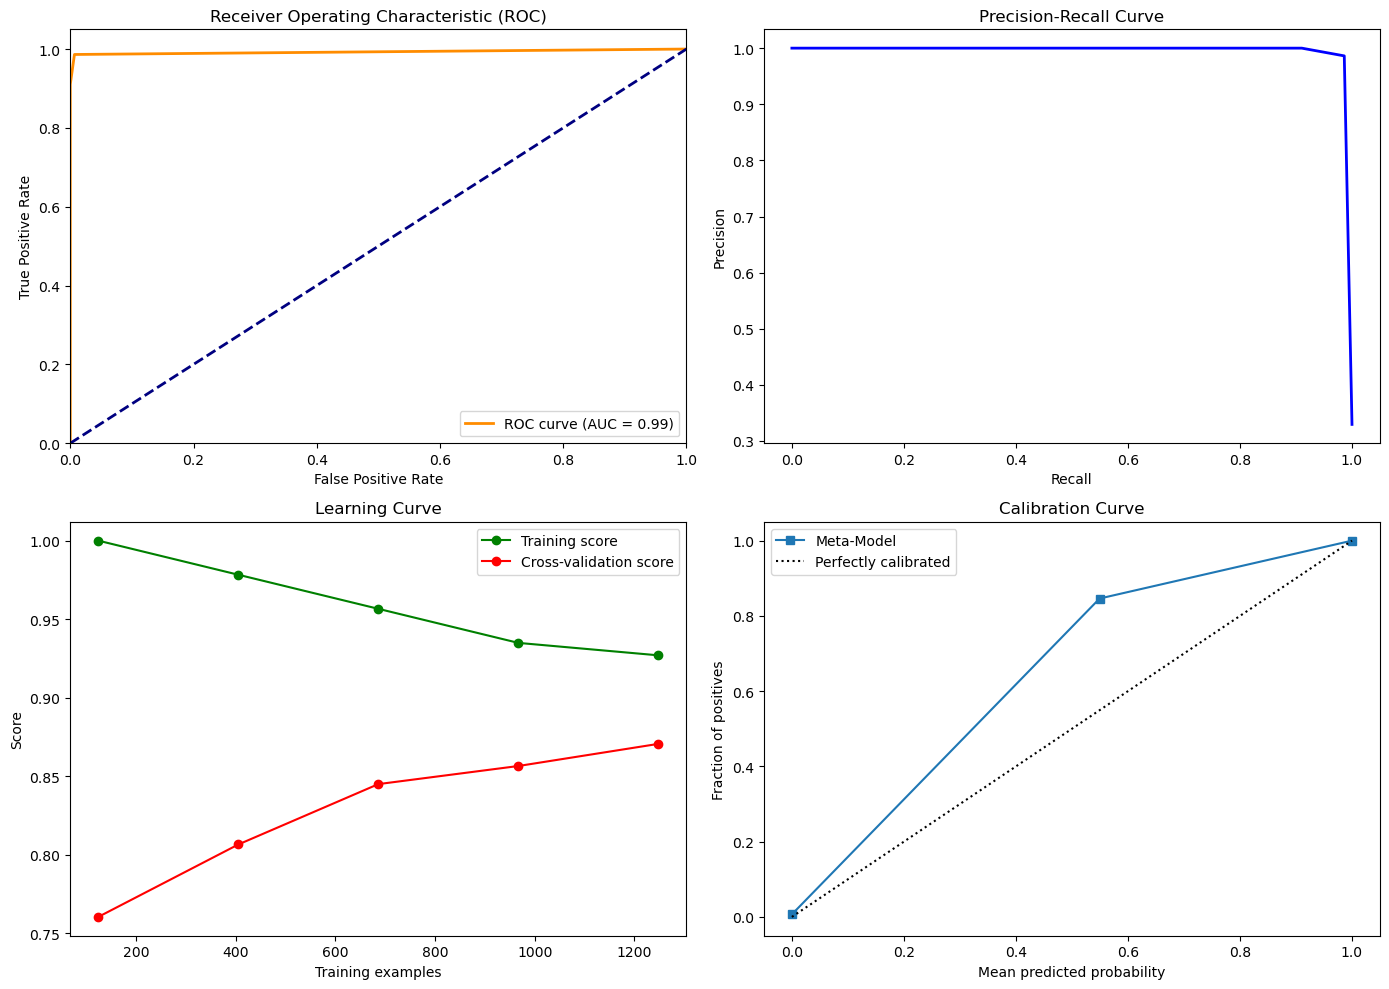

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, 
                             accuracy_score, precision_score, recall_score, f1_score, 
                             matthews_corrcoef, confusion_matrix, classification_report)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define base models
base_models = [
    ('svm', SVC(kernel='rbf', C=1, gamma=0.1, probability=True, random_state=0)),
    ('rf', RandomForestClassifier(n_estimators=103, max_depth=38, max_features='log2', 
                                  min_samples_leaf=1, min_samples_split=2, random_state=0))
]

# Meta model (Choose one here)
meta_model1 = GradientBoostingClassifier()  # LogisticRegression(), MLPClassifier() can also be used

# Split data (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=0)

# Fit base models and get predictions from them
base_train_preds = np.zeros((X_train.shape[0], len(base_models)))  # Collect training predictions for meta-model
base_test_preds = np.zeros((X_test.shape[0], len(base_models)))  # Collect test predictions for meta-model

for idx, (name, model) in enumerate(base_models):
    # Train the base model
    model.fit(X_train, y_train)
    
    # Get predictions on the training and test sets
    base_train_preds[:, idx] = model.predict_proba(X_train)[:, 1]  # Probability of class 1
    base_test_preds[:, idx] = model.predict_proba(X_test)[:, 1]

# Fit the meta-model using the base model predictions as input features
meta_model1.fit(base_train_preds, y_train)

# Predict using the meta-model on the test data
final_predictions = meta_model1.predict(base_test_preds)
y_prob = meta_model1.predict_proba(base_test_preds)[:, 1]  # Probabilities for the positive class

# Compute various metrics
accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions)
recall = recall_score(y_test, final_predictions)  # Sensitivity
f1 = f1_score(y_test, final_predictions)
mcc = matthews_corrcoef(y_test, final_predictions)

# Confusion matrix and Specificity calculation
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)  # Specificity calculation

# Display the metrics
print(f'Final Meta-Model Test accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Sensitivity (Recall): {recall}')
print(f'Specificity: {specificity}')
print(f'F1 Score: {f1}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report(y_test, final_predictions))

# ---- Visualization Section ----

# Plot ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.subplot(2, 2, 2)
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Plot Learning Curve
train_sizes, train_scores, test_scores = learning_curve(meta_model1, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.subplot(2, 2, 3)
plt.plot(train_sizes, train_scores_mean, 'o-', color='green', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")

# Plot Calibration Curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob, n_bins=10)

plt.subplot(2, 2, 4)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Meta-Model")
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc="best")

plt.tight_layout()
plt.show()




